In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

In [2]:
data = pd.read_csv("Reduced_Train.csv")

In [3]:
# Drop the 'ID' column
df = data.drop(columns=['ID'])

# Drop rows with null values
df = df.dropna()


In [4]:
from sklearn.preprocessing import LabelEncoder

# OneHot Encoding for 'Warehouse_block', 'Mode_of_Shipment', and 'Gender'
df = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment', 'Gender'], drop_first=True)

# Label Encoding for 'Product_importance'
label_encoder = LabelEncoder()
df['Product_importance'] = label_encoder.fit_transform(df['Product_importance'])


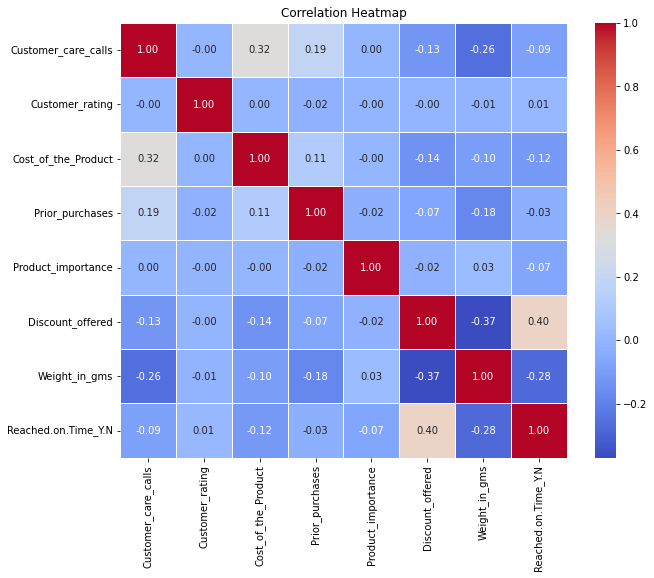

In [5]:
numeric_data = df.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()


# Plot heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show plot
plt.title('Correlation Heatmap')
plt.show()

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Discount_offered', 'Weight_in_gms']
Customer_care_calls
Median 4.0
Mode 0    4
Name: Customer_care_calls, dtype: int64


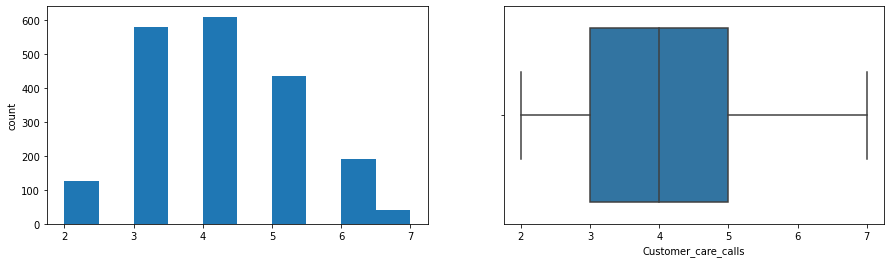

Customer_rating
Median 3.0
Mode 0    2
Name: Customer_rating, dtype: int64


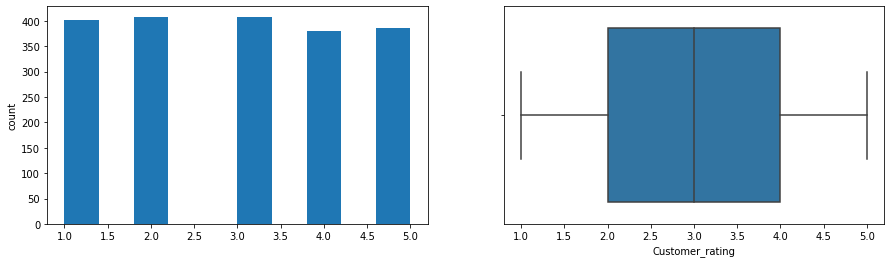

Cost_of_the_Product
Median 215.0
Mode 0    248
Name: Cost_of_the_Product, dtype: int64


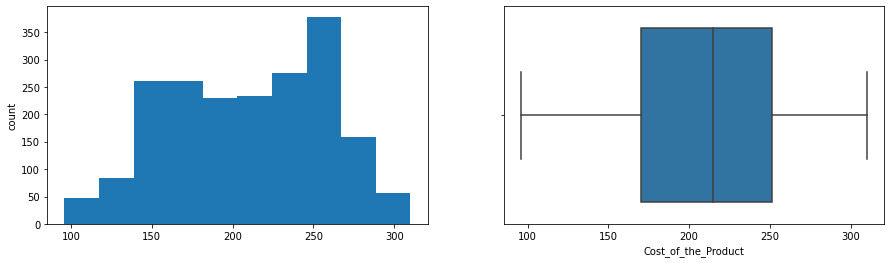

Prior_purchases
Median 3.0
Mode 0    3
Name: Prior_purchases, dtype: int64


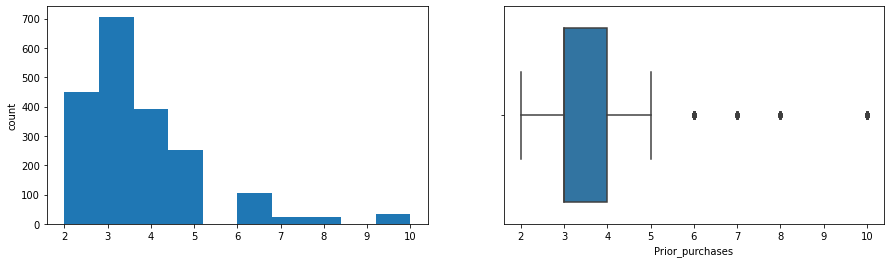

Product_importance
Median 1.0
Mode 0    1
Name: Product_importance, dtype: int32


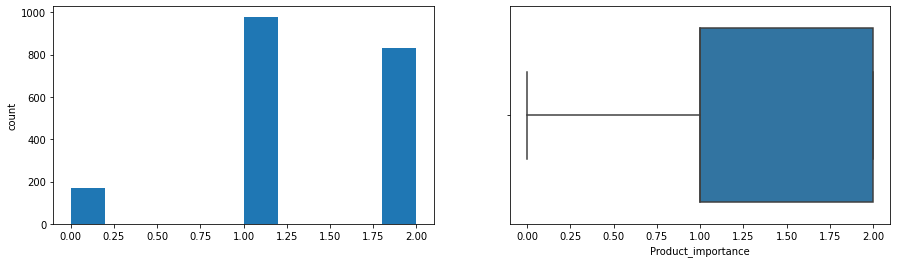

Discount_offered
Median 7.0
Mode 0    1
1    5
Name: Discount_offered, dtype: int64


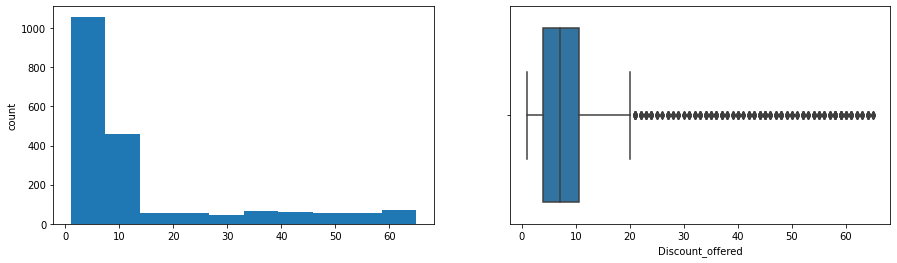

Weight_in_gms
Median 4070.0
Mode 0    1066.0
1    4883.0
Name: Weight_in_gms, dtype: float64


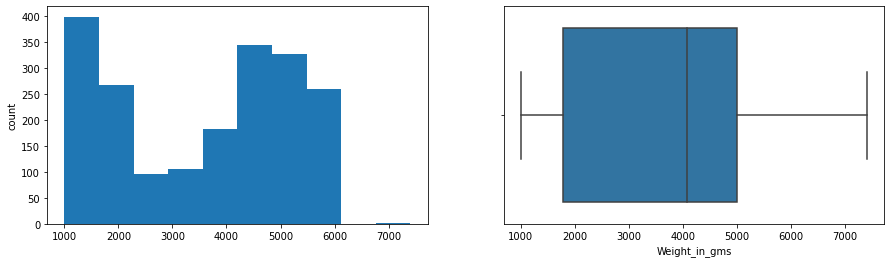

In [6]:
#CATEGORICAL AND NUMERIC COLUMNS

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
num_cols.remove('Reached.on.Time_Y.N')
print(num_cols)
#UNIVARIATE NUMERIC ANALYSIS


for col in num_cols:

    print(col)
    print("Median",df[col].median())
    print("Mode",df[col].mode())
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is already loaded
X = df[['Discount_offered']]  # Selecting 'Discount_offered' as the independent variable
y = df['Weight_in_gms']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [8]:
# # Scaling the feature
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [9]:

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


Mean Squared Error: 2195498.2743106047
R² Score: 0.11348977692483508


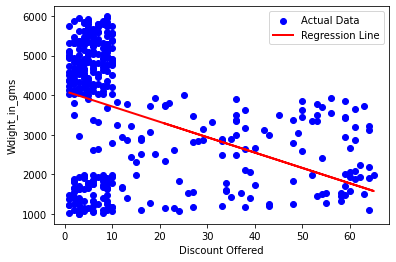

In [10]:

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualizing the regression line
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Discount Offered")
plt.ylabel("Wdight_in_gms")
plt.legend()
plt.show()



In [11]:
print("Gini Index Decision Tree SCores")
print("Accurcy:", accuracy_score(y_test, y_pred_gini))
print("Precision:", precision_score(y_test, y_pred_gini, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_gini, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gini))

Gini Index Decision Tree SCores


NameError: name 'y_pred_gini' is not defined

In [ ]:
print("Entropy Decision Tree Scores")
print("Accurcy:", accuracy_score(y_test, y_pred_entropy))
print("Precision:", precision_score(y_test, y_pred_entropy, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_entropy, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_entropy))

Entropy Decision Tree Scores
Accurcy: 0.6675062972292192
Precision: 0.6607597288410938
F1 Score: 0.6627394119459779
Confusion Matrix:
 [[ 75  75]
 [ 57 190]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53       150
           1       0.72      0.77      0.74       247

    accuracy                           0.67       397
   macro avg       0.64      0.63      0.64       397
weighted avg       0.66      0.67      0.66       397



In [ ]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print("Comparative Analysis:")
print(f"Gini Index Accuracy: {accuracy_gini}")
print(f"Entropy Accuracy: {accuracy_entropy}")

Comparative Analysis:
Gini Index Accuracy: 0.6750629722921915
Entropy Accuracy: 0.6675062972292192


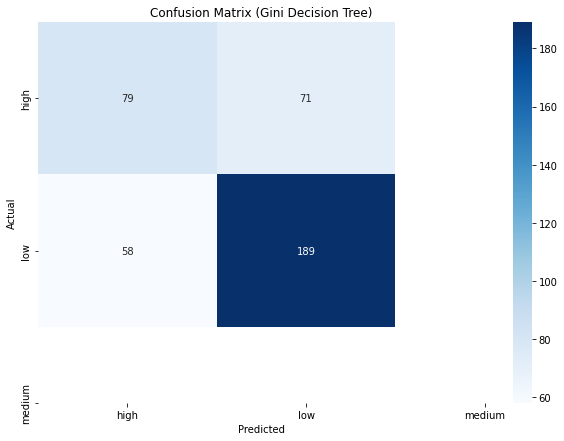

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_test, y_pred_gini),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_
)
plt.title("Confusion Matrix (Gini Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
 
#Gini Decision Tree

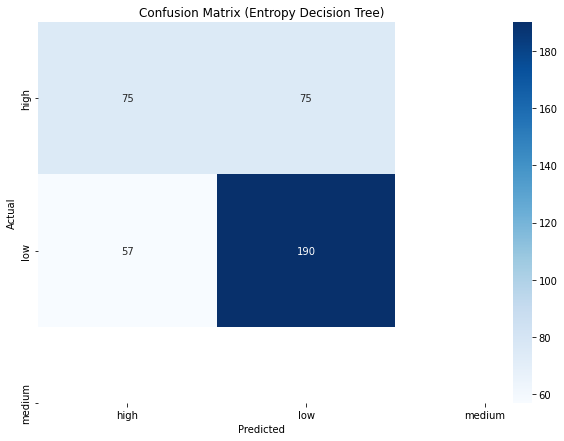

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_test, y_pred_entropy),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_
)
plt.title("Confusion Matrix (Entropy Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Entropy Decision Tree